In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
from sklearn.model_selection import train_test_split

In [26]:
class neural_layer():
 
  def __init__(self, n_conn, n_neur, act_f):
    
    self.act_f = act_f
    
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1


def create_nn(topology, act_f):
  
  nn = []
  
  for l, layer in enumerate(topology[:-1]):
    
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
  return nn


def execute(neural_net, X):
 
    
    s=[(None,X)]     
    # Forward pass
    for l in range(0,len(neural_net)):
     
        z = s[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        s.append((z,a))    
    return s
    
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  

    
  out=execute(neural_net,X)
    
  deltas = []
    
  for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](z))
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](z))
       
      _W = neural_net[l].W
 
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
      
  return out[-1][1]

def visualize(nn,X,Y,Train_error,Test_error,x0lim,x1lim,res):
    
    x0_grid = np.linspace(x0lim[0], x0lim[1], res)
    x1_grid = np.linspace(x0lim[0], x0lim[1], res)

    Y_grid = np.zeros((res, res))
    
    fig2, ax = plt.subplots(1, 2)

    for i0, x0 in enumerate(x0_grid):
      for i1, x1 in enumerate(x1_grid):          
        Y_grid[i0, i1]=execute(nn,np.array([[x0, x1]]))[-1][1]
      
    ax[0].pcolormesh(x0_grid, x1_grid, Y_grid, cmap="coolwarm")
    
    ax[0].scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    ax[0].scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
    ax[0].axis("equal")
    ax[0].set_xlabel("x0")
    ax[0].set_ylabel("x1")
    
    ax[1].plot(range(len(Train_error)), Train_error)
    ax[1].plot(range(len(Test_error)), Test_error)
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Train and Test Errors")
    
    plt.subplots_adjust(left=2, right=4, wspace=0.45)
    
    clear_output(wait=True)

    plt.show()

(800, 2)
(800, 1)


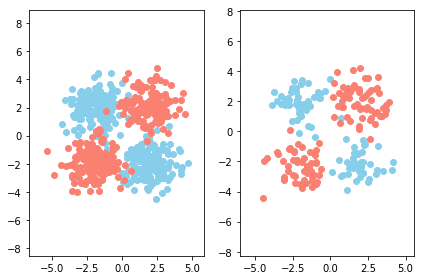

In [27]:
N=200
np.random.seed(10)
X1 = np.r_[np.random.randn(N,2)-[2,-2],np.random.randn(N,2)+[2,-2]];
X2 = np.r_[np.random.randn(N,2)-[2, 2],np.random.randn(N,2)+[2, 2]];
X = np.concatenate((X1,X2))
Y = [0]*2*N+[1]*2*N
Y = np.asarray(Y)
Y = Y[:, np.newaxis]


print(X.shape)
print(Y.shape)

Xe, Xv, Ye, Yv =train_test_split(X,Y)

fig1,axs=plt.subplots(1,2)

axs[0].scatter(Xe[Ye[:, 0] == 0, 0], Xe[Ye[:, 0] == 0, 1], c="skyblue")
axs[0].scatter(Xe[Ye[:, 0] == 1, 0], Xe[Ye[:, 0] == 1, 1], c="salmon")

axs[0].set(xlim=(-2, 2), ylim=(-2, 2))
axs[0].axis("equal")

axs[1].scatter(Xv[Yv[:, 0] == 0, 0], Xv[Yv[:, 0] == 0, 1], c="skyblue")
axs[1].scatter(Xv[Yv[:, 0] == 1, 0], Xv[Yv[:, 0] == 1, 1], c="salmon")

axs[1].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1].axis("equal")

plt.subplots_adjust(left=1.5, right=3, wspace=0.5)
fig1.tight_layout()
plt.show()


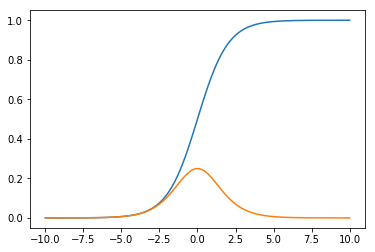

In [28]:
#Activation Funtions
relu = lambda x: np.maximum(0, x)

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: sigm[0](x) * (1 - sigm[0](x)))

th = (lambda x: np.tanh(x),
        lambda x: 1/(np.cos(x)**2))

x=np.linspace(-10,10,100)
plt.plot(x,sigm[0](x))
plt.plot(x,sigm[1](x))
plt.show()



In [29]:
# Two inputs
#First Layer: Four Neurons 
#Hidden Layer: Eigth Neurons
#Output Layer: One Neuron
top = [2, 4, 8, 1]

red = create_nn(top, sigm)  

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: 2*(Yp - Yr))


Terr = []
Verr = []


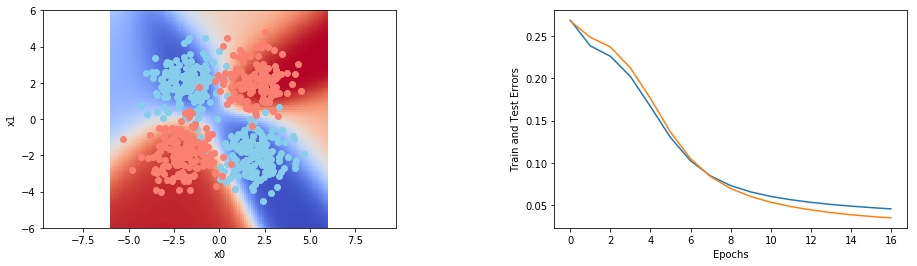

KeyboardInterrupt: 

In [30]:
for i in range(2800):
    
  # Training the network
  pY = train(red, Xe, Ye, l2_cost, lr=0.0035)
  
  if i % 40 == 0:  
  
    Terr.append(l2_cost[0](pY, Ye))
    pYv = execute(red,Xv)[-1][1]
    Verr.append(l2_cost[0](pYv, Yv))
    
    x0lim=[-6,6]
    x1lim=[-5,5]
    res=100
    
    visualize(red,Xe,Ye,Terr,Verr,x0lim,x1lim,res)
  
    time.sleep(0.5)  
    